**Ejemplo**. Se requiere diseñar un contenedor de desechos, cuya forma será la de un prisma rectangular de dimensiones x, y, z como se muestra en la figura. El volumen del contenedor deberá ser de 0.08 $m^3$. Por requerimientos, la altura debe estar en el rango 0.6-0.8 m, y los lados de la base deben medir al menos 0.1 m. Luego, la idea es diseñar el contenedor de tal forma que se utilice la menor cantidad de material posible. Nota: *El contenedor está abierto en la parte superior*.

<img src="/img/p1.jpg" width="150px">

  
  


La cantidad de material utilizada para fabricar el contenedor está directamente relacionada con el área del prisma rectangular, donde esta corresponde a la suma de las áreas para cada una de las caras, luego, basándonos en el esquema de la figura anterior, se puede expresar el área en función de sus dimensiones como sigue: 

$$ A(x_1,x_2,x_3) = 2x_1x_3 + 2x_2x_3 + x_1x_2 $$

De la restricción de volumen se tiene que:

$$ V = x_1 x_2 x_3 = 0.08\,\, \text{m}^3  \,\,\,\,\,\, \rightarrow \,\,\,\,\,\, x_3 = \frac{V}{x_1 x_2} $$

Entonces, sustituyendo $x_3$ en la primera ecuación podemos reescribirla en términos de $x_1$ y $x_2$ , como sigue:

$$ A(x_1,x_2) = 2\frac{V}{x_2} + 2\frac{V}{x_1} + x_1x_2 $$

Se pide que $0.6 \leq x_3 \leq 0.8$, lo cual se puede expresar como dos ecuaciones de restricción:

$$ g_1(x_1,x_2) = \frac{V}{x_1x_2} - 0.6 \geq 0 $$
$$ g_2(x_1,x_2) = \frac{V}{x_1x_2} - 0.8 \leq 0 $$

Además, para los requirimientos dimensionales de la base se tiene:

$$ g_3(x_1,x_2) = x_1 - 0.1 \geq 0 $$
$$ g_4(x_1,x_2) = x_2 - 0.1 \geq 0 $$



## Óptimo no restringido

Un valor óptimo no restringido puede calcularse mediante herramientas elementales de cálculo variacional. Para obtener un punto crítico se resuelve el sistema de ecuaciones resultante de igualar a cero el gradiente de la función, es decir:

$$ \left[ \vec{\nabla} f \right] = [0] $$

Esto lo podemos calcular utilizando SymPy. Importamos la librería y las funciones `hessian` y `zeros` del módulo `matrices`:

In [134]:
from __future__ import division
import sympy as sym
from sympy.matrices import hessian, zeros
sym.init_printing(use_latex="mathjax")

def gradient(f, varls):
    """ Calcula el gradiente de una función f(x1,x2,...)"""
    n = len(varls)
    G = zeros(n,1)
    for i in range(n):
        G[i] = f.diff(varls[i])
    return G

Definimos las variables simbólicas a utilizar y la función $A(x_1,x_2)$

In [136]:
x1,x2,V = sym.symbols("x_1,x_2,V")
A = 2*(V/x2) + 2*(V/x1) + x1*x2

In [138]:
G = gradient(A, (x1,x2))
sym.Eq(G,zeros(2,1))

⎡  2⋅V     ⎤      
⎢- ─── + x₂⎥ = ⎡0⎤
⎢    2     ⎥   ⎢ ⎥
⎢  x₁      ⎥   ⎣0⎦
⎢          ⎥      
⎢  2⋅V     ⎥      
⎢- ─── + x₁⎥      
⎢    2     ⎥      
⎣  x₂      ⎦      

In [139]:
sol = sym.solve(sym.Eq(G,zeros(2,1)), (x1,x2))
sol

⎡                            ⎛3 ___ 3 ___              3 ___ 3 ___            
⎢⎛3 ___ 3 ___  3 ___ 3 ___⎞  ⎜╲╱ 2 ⋅╲╱ V ⋅(-1 + √3⋅ⅈ)  ╲╱ 2 ⋅╲╱ V ⋅(-1 + √3⋅ⅈ)
⎢⎝╲╱ 2 ⋅╲╱ V , ╲╱ 2 ⋅╲╱ V ⎠, ⎜───────────────────────, ───────────────────────
⎣                            ⎝           2                        2           

⎞  ⎛ 3 ___ 3 ___               3 ___ 3 ___            ⎞⎤
⎟  ⎜-╲╱ 2 ⋅╲╱ V ⋅(1 + √3⋅ⅈ)   -╲╱ 2 ⋅╲╱ V ⋅(1 + √3⋅ⅈ) ⎟⎥
⎟, ⎜────────────────────────, ────────────────────────⎟⎥
⎠  ⎝           2                         2            ⎠⎦

(0, 1)

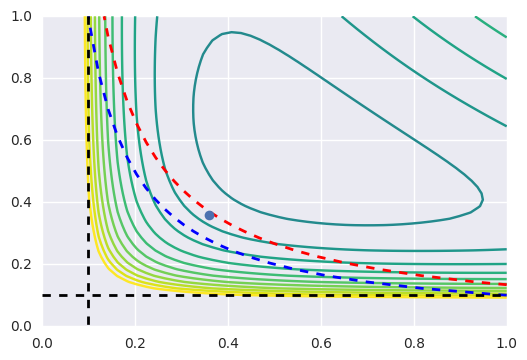

In [132]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

V = 0.08
xmin,xmax,ymin,ymax = 0,1,0,1
xx1 = np.linspace(xmin,xmax)
xx2 = np.linspace(ymin,ymax)
x1, x2 = np.meshgrid(xx1, xx2)
f = 2*(V/x2) + 2*(V/x1) + x1*x2
g1 = (V/(x1*x2)) - 0.6
g2 = (V/(x1*x2)) - 0.8
g3 = x1 - 0.1
g4 = x2 - 0.1

fig = plt.figure()
ax = fig.add_subplot(111)

lvl = np.linspace(0.001, 2, 20)
cl = ax.contour(x1, x2, f, levels=lvl, cmap="viridis")
#ax.clabel(cl)
ax.contour(x1, x2, g1, levels=[0], linestyles='--', linewidths=2, colors='r')
ax.contour(x1, x2, g2, levels=[0], linestyles='--', linewidths=2, colors='b')
ax.contour(x1, x2, g3, levels=[0], linestyles='--', linewidths=2, colors='k')
ax.contour(x1, x2, g4, levels=[0], linestyles='--', linewidths=2, colors='k')
ax.plot([0.36],[0.36],'o')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)